In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OrdinalEncoder , MinMaxScaler
from sklearn.metrics import accuracy_score , precision_score , recall_score , confusion_matrix

import seaborn as sns

import joblib

In [2]:
DATA_FILE_PATH = r"./hr_data.csv"

df = pd.read_csv(DATA_FILE_PATH)

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [5]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Data Visualization

In [7]:
left_grp = df.groupby(['left']).size()


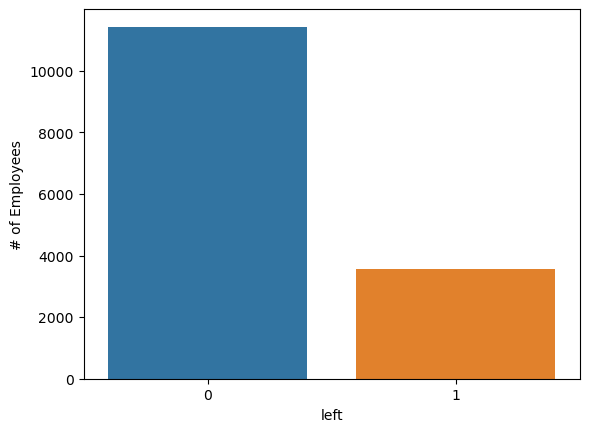

In [8]:
plt.xlabel("Left ?")
plt.ylabel("# of Employees")
sns.barplot(x = left_grp.index ,y = left_grp.values)
plt.show()

In [9]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [10]:
features = ['Department' ,'satisfaction_level' , 'salary' , 'promotion_last_5years','time_spend_company' , 'average_montly_hours' ]

In [11]:
X = df[features]
y = df['left']

In [12]:
X.head()

,Department,satisfaction_level,salary,promotion_last_5years,time_spend_company,average_montly_hours
0,sales,0.38,low,0,3,157
1,sales,0.80,medium,0,6,262
2,sales,0.11,medium,0,4,272
3,sales,0.72,low,0,5,223
4,sales,0.37,low,0,3,159


In [13]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

Data Preprocessing

In [14]:
ordEncoder = OrdinalEncoder(categories=[['low','medium','high']])

In [15]:
salaries = np.reshape(X['salary'].values , [-1,1])
ordEncoder.fit_transform(salaries)

array([[0.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]])

In [16]:
salaries = ordEncoder.fit_transform(salaries)


In [17]:
ordEncoder.categories_

[array(['low', 'medium', 'high'], dtype=object)]

In [18]:
salaries = pd.DataFrame(salaries)

In [19]:
X = pd.concat([X , salaries] , axis= "columns")

In [20]:
X.head()

,Department,satisfaction_level,salary,promotion_last_5years,time_spend_company,average_montly_hours,0
0,sales,0.38,low,0,3,157,0.0
1,sales,0.80,medium,0,6,262,1.0
2,sales,0.11,medium,0,4,272,1.0
3,sales,0.72,low,0,5,223,0.0
4,sales,0.37,low,0,3,159,0.0


In [21]:
X.drop(columns=['salary'],inplace=True)

In [22]:
X.rename(columns={0 : "salary"} , inplace= True)

In [23]:
X.head()

,Department,satisfaction_level,promotion_last_5years,time_spend_company,average_montly_hours,salary
0,sales,0.38,0,3,157,0.0
1,sales,0.80,0,6,262,1.0
2,sales,0.11,0,4,272,1.0
3,sales,0.72,0,5,223,0.0
4,sales,0.37,0,3,159,0.0


In [24]:
dep = pd.get_dummies(X['Department'])

In [25]:
dep.head()

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0


In [26]:
dep.drop(columns=['technical'] , inplace =True)

In [27]:
X.drop(columns= ['Department'],inplace = True)

In [28]:
X = pd.concat([X , dep] , axis= "columns" )

In [29]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   promotion_last_5years  14999 non-null  int64  
 2   time_spend_company     14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   salary                 14999 non-null  float64
 5   IT                     14999 non-null  uint8  
 6   RandD                  14999 non-null  uint8  
 7   accounting             14999 non-null  uint8  
 8   hr                     14999 non-null  uint8  
 9   management             14999 non-null  uint8  
 10  marketing              14999 non-null  uint8  
 11  product_mng            14999 non-null  uint8  
 12  sales                  14999 non-null  uint8  
 13  support                14999 non-null  uint8  
dtypes: float64(2), int64(3), uint8(9)
memory usage: 717.9 

In [30]:
X.head()

,satisfaction_level,promotion_last_5years,time_spend_company,average_montly_hours,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support
0,0.38,0,3,157,0.0,0,0,0,0,0,0,0,1,0
1,0.80,0,6,262,1.0,0,0,0,0,0,0,0,1,0
2,0.11,0,4,272,1.0,0,0,0,0,0,0,0,1,0
3,0.72,0,5,223,0.0,0,0,0,0,0,0,0,1,0
4,0.37,0,3,159,0.0,0,0,0,0,0,0,0,1,0


In [31]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [32]:
scaler = MinMaxScaler()

In [33]:
X = scaler.fit_transform(X)

In [34]:
X = pd.DataFrame(X)

In [35]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.318681,0.0,0.125,0.285047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.780220,0.0,0.500,0.775701,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.021978,0.0,0.250,0.822430,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.692308,0.0,0.375,0.593458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.307692,0.0,0.125,0.294393,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [36]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [37]:
RANDOM_STATE = 0
TRAIN_SIZE = 0.8
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size= TRAIN_SIZE , random_state= RANDOM_STATE)

Training the model

In [38]:
model = LogisticRegression()

In [39]:
model.fit(X.values , y)

LogisticRegression()

In [40]:
y_pred = model.predict(X_test)

Evaluation of model

In [41]:
accuracy_score(y_test , y_pred)

0.7723333333333333

In [42]:
precision_score(y_test , y_pred)

0.5264705882352941

In [43]:
recall_score(y_test, y_pred)

0.2553495007132668

In [44]:
confusion_matrix(y_test , y_pred)

array([[2138,  161],
       [ 522,  179]])

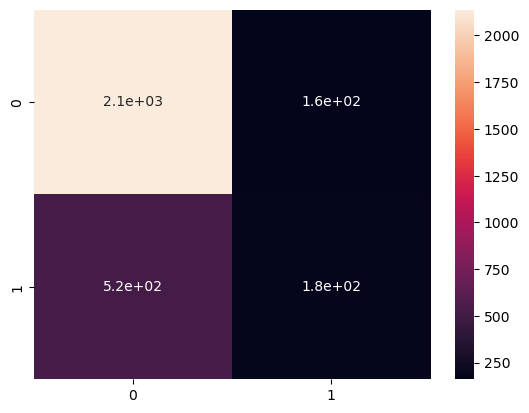

In [45]:
plt.xlabel("Actual")
plt.ylabel("Predicted")
sns.heatmap(confusion_matrix(y_test , y_pred), annot= True)
plt.show()

Saving the model

In [46]:
MODEL_SAVE_PATH = r"../HR Analytics/HR_model"


In [47]:
joblib.dump(model , MODEL_SAVE_PATH)

['../HR Analytics/HR_model']

In [48]:
del model

Loading the model

In [49]:
model = joblib.load(MODEL_SAVE_PATH)

In [50]:
y_pred = model.predict(X_train)

In [51]:
confusion_matrix(y_train , y_pred)

array([[8473,  656],
       [2121,  749]])

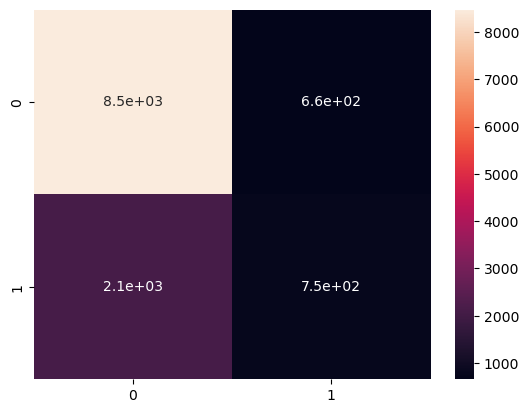

In [52]:
plt.xlabel("Actual")
plt.ylabel("Predicted")
sns.heatmap(confusion_matrix(y_train , y_pred) , annot= True)
plt.show()

In [53]:
print(
    f"""
ACCURACY = {accuracy_score(y_train , y_pred)}
PRECISION = {precision_score(y_train,y_pred)}
RECALL = {recall_score(y_train, y_pred)}
    """
)


ACCURACY = 0.768564047003917
PRECISION = 0.5330960854092527
RECALL = 0.26097560975609757
    
